In [1]:
import cv2

In [2]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

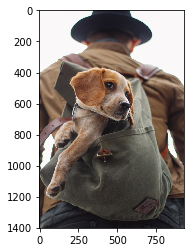

In [4]:
plt.imshow(img1)

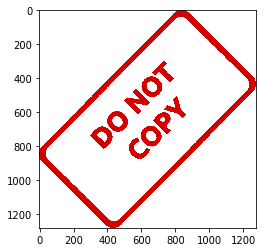

In [5]:
plt.imshow(img2)

In [6]:
img1.shape

(1401, 934, 3)

In [7]:
img2.shape

(1280, 1277, 3)

In [8]:
# BLENDING IMAGES OF THE SAME SIZE

In [9]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

In [21]:
blended = cv2.addWeighted(img1,0.9,img2,0.1,0)

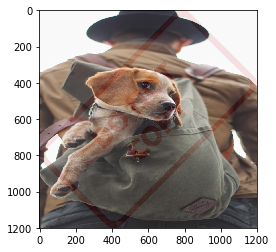

In [22]:
plt.imshow(blended)

In [ ]:
# OVERLAY A SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [23]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [25]:
img2 = cv2.resize(img2,(600,600))

In [26]:
large_img = img1
small_img = img2

In [29]:
x_offset = 0
y_offset = 0

In [30]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [31]:
large_img[y_offset:y_end,x_offset:x_end] = small_img

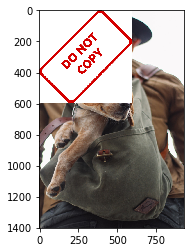

In [32]:
plt.imshow(large_img)

In [ ]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [33]:
img1 = cv2.imread('../DATA/dog_backpack.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [34]:
img2 = cv2.resize(img2,(600,600))

In [35]:
img1.shape

(1401, 934, 3)

In [36]:
x_offset = img1.shape[1]-img2.shape[1]
y_offset = img1.shape[0]-img2.shape[0]

In [37]:
x_offset

334

In [38]:
y_offset

801

In [39]:
rows,cols,channels = img2.shape

In [41]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]

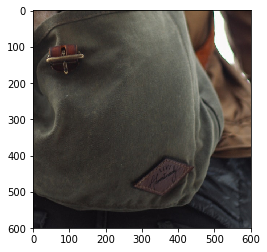

In [43]:
plt.imshow(roi)

In [49]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

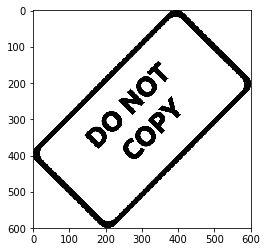

In [51]:
plt.imshow(img2gray,cmap='gray')

In [47]:
img2gray.shape

(600, 600)

In [52]:
mask_inv= cv2.bitwise_not(img2gray)

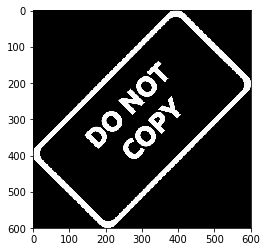

In [54]:
plt.imshow(mask_inv,cmap='gray')

In [55]:
import numpy as np

In [56]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [57]:
white_background.shape

(600, 600, 3)

In [58]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

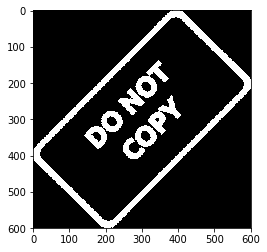

In [59]:
plt.imshow(bk)

In [63]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

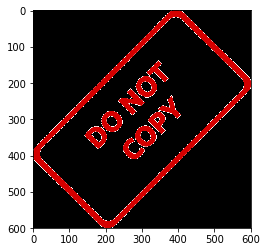

In [64]:
plt.imshow(fg)

In [65]:
final_roi = cv2.bitwise_or(roi,fg)

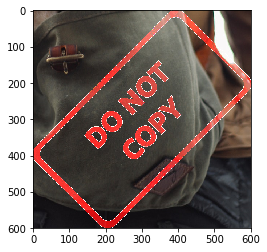

In [66]:
plt.imshow(final_roi)

In [67]:
large_img = img1
small_img = final_roi
x_end = x_offset + cols
y_end = y_offset + rows
large_img[y_offset:y_end,x_offset:x_end] = small_img

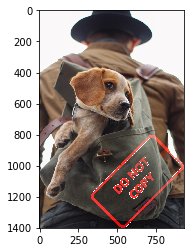

In [68]:
plt.imshow(large_img)